In [25]:
import json

def get_values(json_file_path):
  with open(json_file_path, 'r') as json_file:
      data = json.load(json_file)

  data = data['UsersData']
  first_key = list(data.keys())[0]
  data = data[first_key]
  data = data['readings']

  distance1 = []
  distance2 = []
  voltage0 = []
  voltage1 = []
  voltage2 = []

  for key, value in data.items():
    distance1.append(float(value['distance1']))
    distance2.append(float(value['distance2']))
    voltage0.append(float(value['voltage0']))
    voltage1.append(float(value['voltage1']))
    voltage2.append(float(value['voltage2']))

  return {'distance1':distance1,'distance2':distance2,'voltage0':voltage0,'voltage1':voltage1,'voltage2':voltage2}


In [26]:
normal = get_values('s3r_normal.json')
circum = get_values('s3r_circum.json')
gm = get_values('s3r_gm.json')
limping = get_values('s3r_limping.json')
parkinsons = get_values('s3r_parkinsons.json')
scissoring = get_values('s3r_scissoring.json')

In [27]:
import matplotlib.pyplot as plt

def plot(parameter):
  colors = ['k', 'g', 'b', 'r', 'm', 'y']
  labels = ['normal', 'circum', 'gm', 'limping', 'parkinsons', 'scissoring']

  plt.figure(figsize=(15, 8))

  plt.plot(normal[parameter], color=colors[0], label=labels[0])
  plt.plot(circum[parameter], color=colors[1], label=labels[1])
  plt.plot(gm[parameter], color=colors[2], label=labels[2])
  plt.plot(limping[parameter], color=colors[3], label=labels[3])
  plt.plot(parkinsons[parameter], color=colors[4], label=labels[4])
  plt.plot(scissoring[parameter], color=colors[5], label=labels[5])

  plt.xlabel('time')
  plt.ylabel('Pressure values exerted by toe proprtional to voltage')
  plt.title('Voltage vs time')
  plt.legend()

  plt.show()

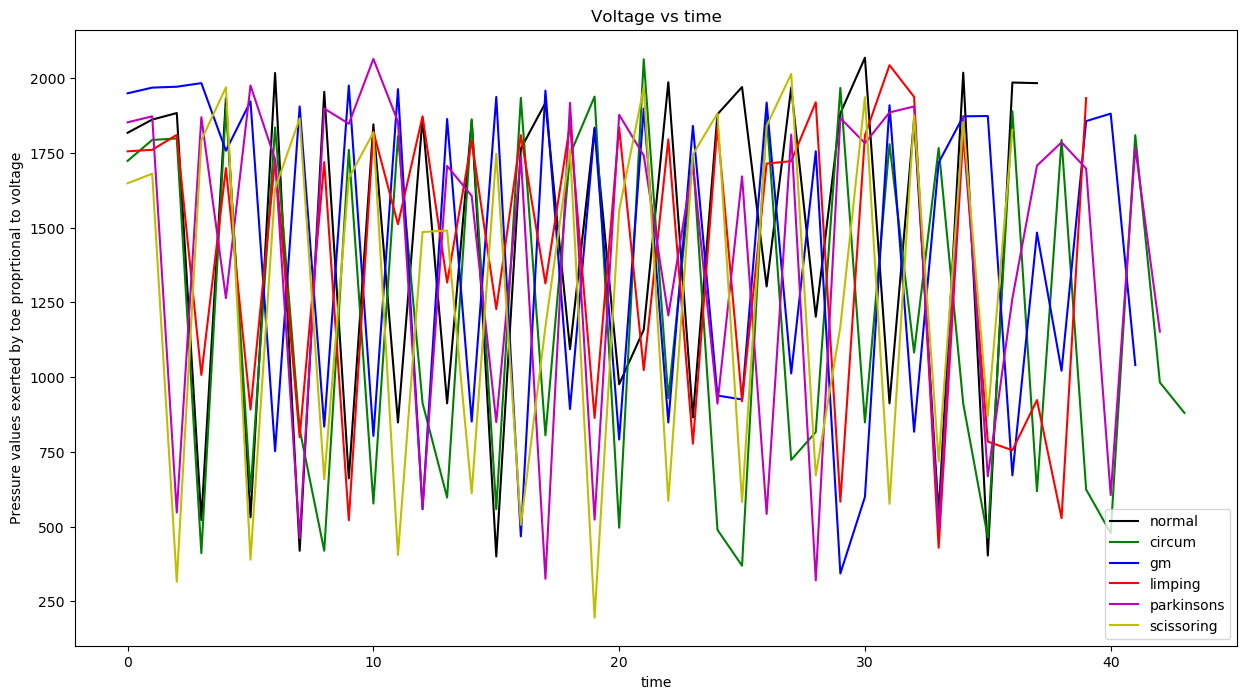

In [28]:
plot('voltage1')